 Use the Univariate_analysis.ipynb and the dataset in EFIplus_medit.zip to plot strip plots, histograms and boxplots (and any additional plot that you feel appropriate) of Annual Mean Temperature (temp_ann) at each of the four catchments with the highest number of fish sampling sites. Try to fit each type of graph in a single window (4 graphs per window - check how to do it in previous examples I gave, which are available in github).

In [1]:
#importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:

df = pd.read_csv('EFIplus_medit.zip',compression='zip', sep=";")
print(df)

       Site_code   Latitude  Longitude   Country Catchment_name  Galiza  \
0     ES_01_0002  38.102003  -4.096070     Spain   Guadalquivir       0   
1     ES_02_0001  40.530188  -1.887796     Spain           Tejo       0   
2     ES_02_0002  40.595432  -1.928079     Spain           Tejo       0   
3     ES_02_0003  40.656184  -1.989831     Spain           Tejo       0   
4     ES_02_0004  40.676402  -2.036274     Spain           Tejo       0   
...          ...        ...        ...       ...            ...     ...   
5006      PTVO60  40.641612  -8.325149  Portugal          Vouga       0   
5007      PTVO61  40.729015  -8.098851  Portugal          Vouga       0   
5008      PTVO62  40.727959  -8.107344  Portugal          Vouga       0   
5009      PTVO63  40.817783  -8.224903  Portugal          Vouga       0   
5010      PTVO64  40.794352  -8.255380  Portugal          Vouga       0   

      Subsample  Calib_EFI_Medit  Calib_connect  Calib_hydrol  ...  \
0             1              

In [5]:
df.head(10)

,Site_code,Latitude,Longitude,Country,Catchment_name,Galiza,Subsample,Calib_EFI_Medit,Calib_connect,Calib_hydrol,...,Squalius malacitanus,Squalius pyrenaicus,Squalius torgalensis,Thymallus thymallus,Tinca tinca,Zingel asper,Squalius sp,Barbatula sp,Phoxinus sp,Iberochondrostoma_sp
0,ES_01_0002,38.102003,-4.096070,Spain,Guadalquivir,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,ES_02_0001,40.530188,-1.887796,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,ES_02_0002,40.595432,-1.928079,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,ES_02_0003,40.656184,-1.989831,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,ES_02_0004,40.676402,-2.036274,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
5,ES_02_0005,40.732830,-2.078003,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
6,ES_02_0006,40.788013,-2.152441,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
7,ES_02_0007,40.793682,-2.285236,Spain,Tejo,0,1,1,1,0,...,0,1,0,0,0,0,1,0,0,0
8,ES_02_0008,40.747652,-2.394504,Spain,Tejo,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,ES_02_0010,40.807161,-1.838133,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [6]:
list(df.columns)

['Site_code',
 'Latitude',
 'Longitude',
 'Country',
 'Catchment_name',
 'Galiza',
 'Subsample',
 'Calib_EFI_Medit',
 'Calib_connect',
 'Calib_hydrol',
 'Calib_morphol',
 'Calib_wqual',
 'Geomorph1',
 'Geomorph2',
 'Geomorph3',
 'Water_source_type',
 'Flow_regime',
 'Altitude',
 'Geological_typology',
 'Actual_river_slope',
 'Natural_sediment',
 'Elevation_mean_catch',
 'prec_ann_catch',
 'temp_ann',
 'temp_jan',
 'temp_jul',
 'Barriers_catchment_down',
 'Barriers_river_segment_up',
 'Barriers_river_segment_down',
 'Barriers_number_river_segment_up',
 'Barriers_number_river_segment_down',
 'Barriers_distance_river_segment_up',
 'Barriers_distance_river_segment_down',
 'Impoundment',
 'Hydropeaking',
 'Water_abstraction',
 'Hydro_mod',
 'Temperature_impact',
 'Velocity_increase',
 'Reservoir_flushing',
 'Sedimentation',
 'Channelisation',
 'Cross_sec',
 'Instream_habitat',
 'Riparian_vegetation',
 'Embankment',
 'Floodprotection',
 'Floodplain',
 'Toxic_substances',
 'Acidification',
 '

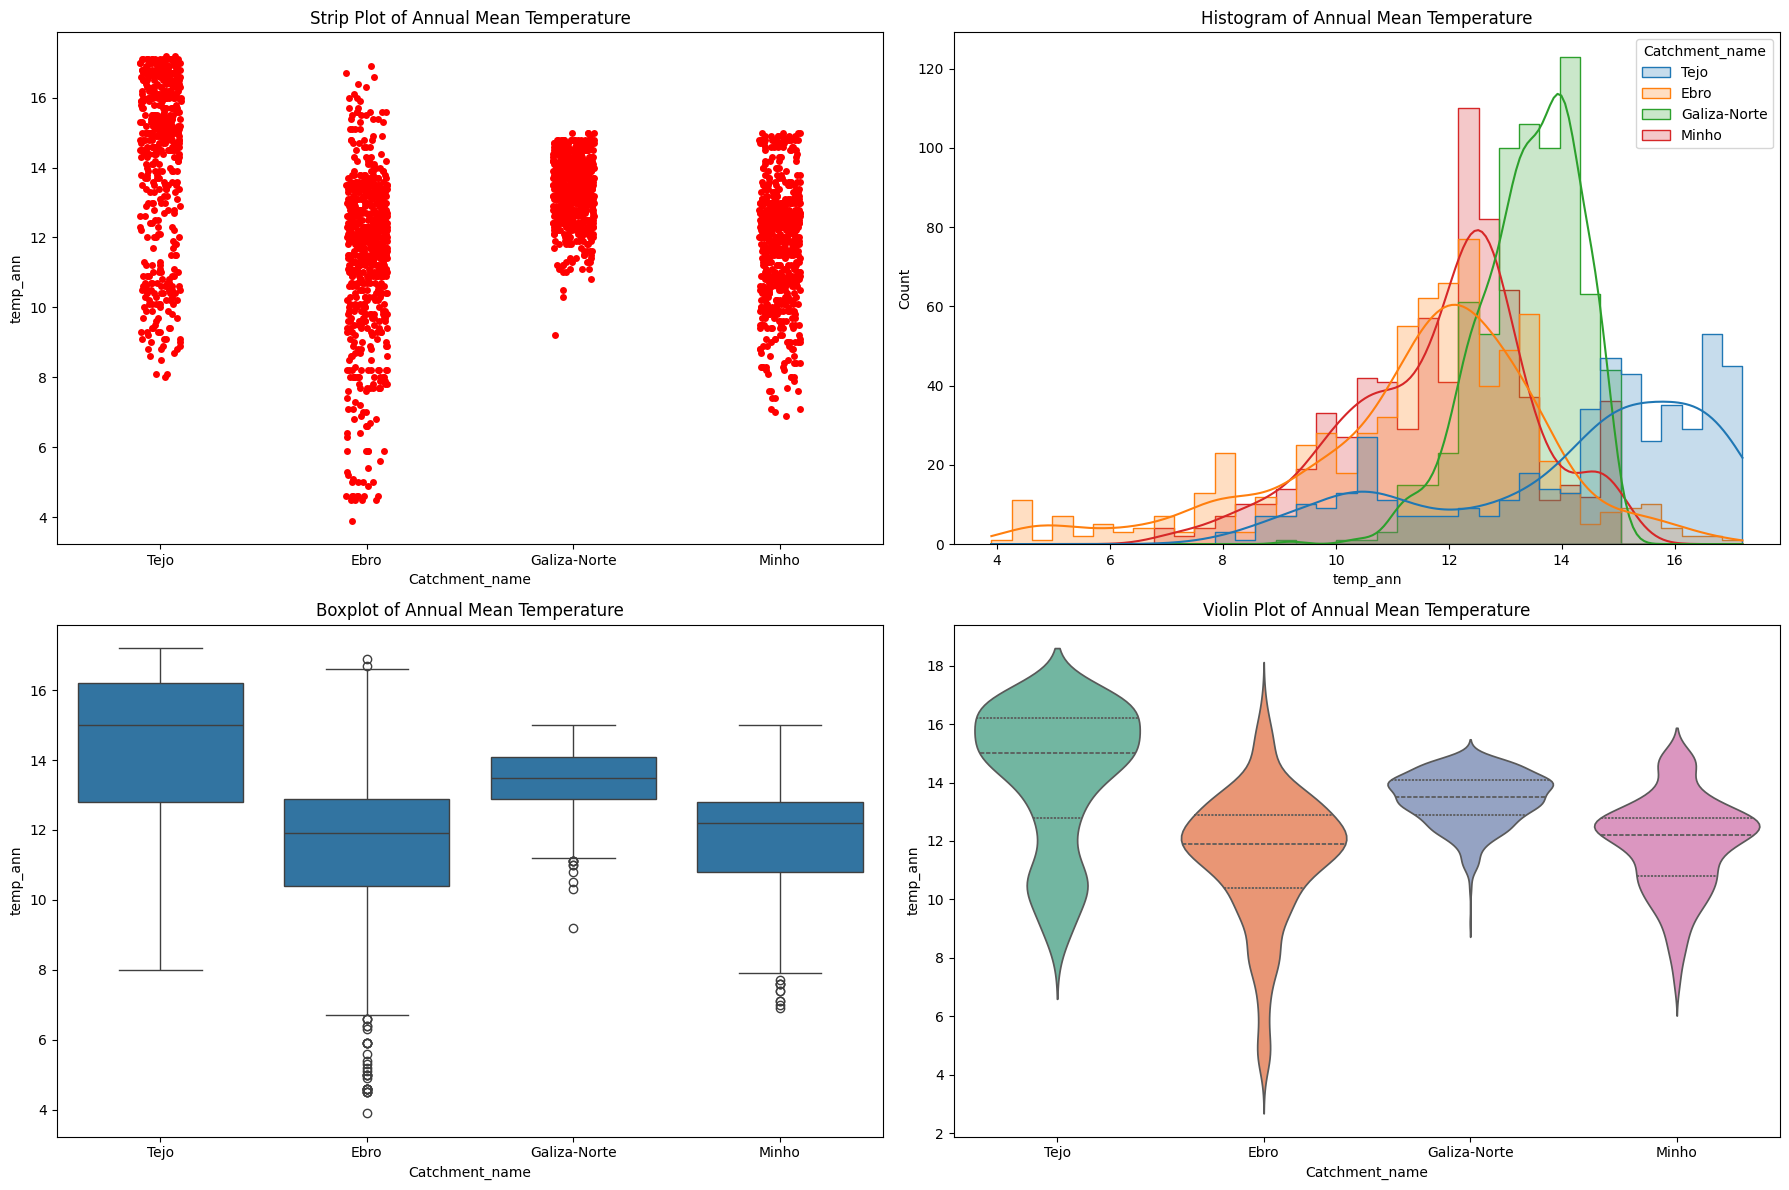

In [7]:
# top four catchments with the highest number of fish sampling sites
top_catchments = df['Catchment_name'].value_counts().nlargest(4).index

# filter dataset for the top catchments
filtered_df = df[df['Catchment_name'].isin(top_catchments)]

# creating a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# strip plot
sns.stripplot(data=filtered_df, x='Catchment_name', y='temp_ann', color='red', ax=axes[0, 0], jitter=True)
axes[0, 0].set_title("Strip Plot of Annual Mean Temperature")

# histogram
sns.histplot(data=filtered_df, x='temp_ann', hue='Catchment_name', element="step", ax=axes[0, 1], kde=True)
axes[0, 1].set_title("Histogram of Annual Mean Temperature")

# boxplot
sns.boxplot(data=filtered_df, x='Catchment_name', y='temp_ann', ax=axes[1, 0])
axes[1, 0].set_title("Boxplot of Annual Mean Temperature")

# violin plot 
sns.violinplot(data=filtered_df, x='Catchment_name', y='temp_ann', hue='Catchment_name', ax=axes[1, 1], inner='quartile', palette="Set2", legend=False)
axes[1, 1].set_title("Violin Plot of Annual Mean Temperature")

plt.tight_layout()
plt.show()

Have a deeper look at the three types of plots and evaluate the pros and cons of each type as univariate visualizations

1. strip plot
vantagens: Mostra todas as observações individuais, o que é ótimo para conjuntos de dados pequenos ou moderados.

Útil para identificar outliers, densidade de pontos e sobreposição de valores.

Permite perceber rapidamente se há uma concentração de valores em certas áreas do eixo y.

desvantagens: Torna-se confuso com grandes volumes de dados, mesmo com jitter, devido à sobreposição.

Não resume os dados com medidas de tendência central ou dispersão (não mostra mediana, quartis, etc.).

Dificuldade em comparar distribuições entre categorias quando há muitos pontos.

2. histograma
vantagens: Muito eficaz para avaliar a distribuição dos dados (simetria, assimetria, modas, etc.).

Permite detectar distribuições normais vs. enviesadas, e perceber se os dados têm múltiplos picos (multimodalidade).

Ao adicionar kde=True, pode-se ver uma curva de densidade suavizada.

desvantagens: A escolha do número de bins (intervalos) pode alterar drasticamente a perceção da distribuição.

Menos eficaz para comparações entre grupos se houver muitas categorias (a cor ou sobreposição pode dificultar).

Não mostra medidas como mediana ou quartis, a não ser que se adicionem manualmente.

3. boxplot
vantagens: Excelente para resumir a distribuição dos dados com mediana, quartis e outliers.

Compacto e informativo, ótimo para comparar várias categorias.

Muito útil para identificar assimetrias e outliers.

desvantagens: Não mostra a densidade ou a forma detalhada da distribuição.

Pode ocultar modas ou padrões multimodais.

Menos informativo se a amostra for muito pequena.

4. violin plot
vantagens: Combina o resumo do boxplot com a distribuição (densidade) dos dados.

Mostra formas mais complexas da distribuição (e.g., bimodalidade).

Mais informativo visualmente que o boxplot, mantendo a mediana e quartis.

desvantagens:Pode ser menos intuitivo para quem não está familiarizado com o conceito de densidade.

Em datasets com poucos pontos, pode dar uma sensação enganadora de continuidade.



I also challenge you to construct a plot that shows how the mean value of temp_ann varies with the size of random samplings of sites. Take 1000 random samples with replacement of increasing sample sizes (e.g. 10, 50, 100, 150, 200, 250, 300, 500 and 1000 observations), compute the mean Temp_ann of each sample and use an appropriate visualization to show how many samples will we need to have a good estimate of the population mean

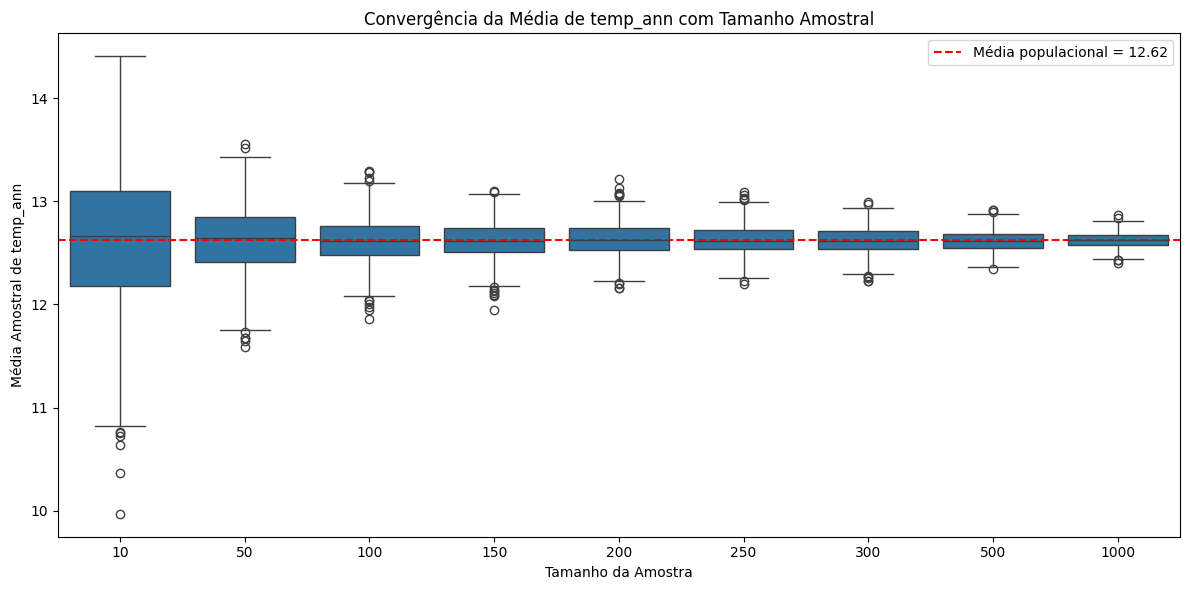

In [8]:

# definir os tamanhos amostrais
sample_sizes = [10, 50, 100, 150, 200, 250, 300, 500, 1000]
n_iterations = 1000

# lista para guardar os resultados
results = []

# loop por tamanho amostral
for size in sample_sizes:
    for _ in range(n_iterations):
        sample = filtered_df['temp_ann'].sample(n=size, replace=True)
        sample_mean = sample.mean()
        results.append({'sample_size': size, 'sample_mean': sample_mean})

# criar DataFrame
results_df = pd.DataFrame(results)

# calcular média real/populacional (de todo o filtered_df)
true_mean = filtered_df['temp_ann'].mean()

# gráfico
plt.figure(figsize=(12, 6))
sns.boxplot(data=results_df, x='sample_size', y='sample_mean')
plt.axhline(true_mean, color='red', linestyle='--', label=f'Média populacional = {true_mean:.2f}')
plt.title('Convergência da Média de temp_ann com Tamanho Amostral')
plt.xlabel('Tamanho da Amostra')
plt.ylabel('Média Amostral de temp_ann')
plt.legend()
plt.tight_layout()
plt.show()
